<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
</p></center>

<h1><center><font size=10>Student-Shubin Zhai's Homework</center></font></h1>
<h1><center>FoodHub Analytics Homework Week of Dec.6</center></h1>

In [1]:
#First install all needed pacakges here
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import packages for the notebook
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data provided
df = pd.read_csv('foodhub_order.csv')

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:

#Review the data structure

#Findings:
#1898 rows and 9 columns
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Review the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
#Analysis of the data stats 

#Findings:
# Total of 1898 customer orders: assume 1.) # of orders as sample is representative;
# Avg cost of order seems to be low (as of 2024).  The analysis is valid only for given time period
# Food prep time seems to be pretty much the same +/- 7-8 mins 
# Delivery time is almost similar to food prep time. 
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [7]:
# Look at the sample data

#Findings:
# Rating is has missing data and needs to deal with it later.
# Weekend and vs weekday: when analyzing the delivery time need to consider the difference
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#Find out if there are missing values(isnull() check) for olumns

#Findings:
# No missing data found
missing_data = df.isnull().sum()
print(missing_data)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [9]:
#Check for category values for column day of week and rating

#Finding: rating column has "Not Given" - no rating and missing value of 1 or 2.
print(df['day_of_the_week'].unique())
print (df['rating'].unique())

['Weekend' 'Weekday']
['Not given' '5' '3' '4']


In [10]:
print(df.loc[df['rating'] =='Not given'].describe)

<bound method NDFrame.describe of       order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
14     1478198        62667      Lucky's Famous Burgers     American   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     American   
1892   1477473        97838                 Han Dynasty      Chinese   
1895   1477819        35309           Blue Ribbon Sushi     Japanese   
1897   1478056       120353           Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0                 30.75 

In [11]:
#Assume valid rating range is between 1 to 5. 5 being the best.  Value of 3 means neutral rating. 
#There are two ways to handle these entries with Not given: 
#1.) remove the rows 
#2.) use neutral rating of 3 to replace Not given values

#Findings:
#The best option is to replace the value of Not given with value of 3 (neutral)
 
dfnew = df.copy()
dfnew.head()
dfnew.loc[dfnew['rating']=='Not given', 'rating']='3'
dfnew.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,3,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,3,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
#Findings:
#min: 4.97, average: 24.16, max: 33
dfnew.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000



### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
#Finding:
# Orders not rated: 736
print(df[df['rating']=='Not given'].count)

<bound method DataFrame.count of       order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
14     1478198        62667      Lucky's Famous Burgers     American   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     American   
1892   1477473        97838                 Han Dynasty      Chinese   
1895   1477819        35309           Blue Ribbon Sushi     Japanese   
1897   1478056       120353           Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0                 30.75  

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [14]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

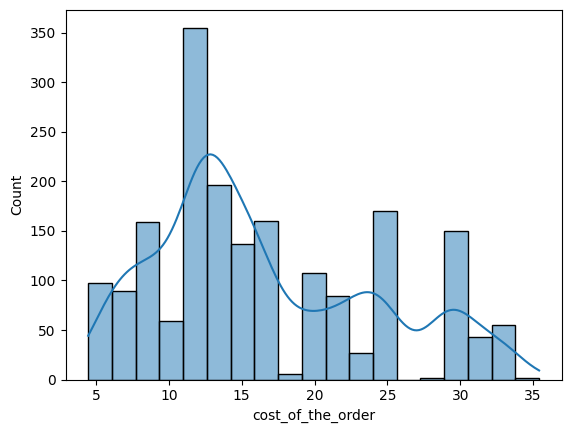

In [15]:
#Let's first see the frequency of price for central tendency of order toatal distribution
sns.histplot(data=dfnew, x='cost_of_the_order', kde=True)

<Axes: title={'center': 'Histogram of Price'}, xlabel='Total Cost of Order', ylabel='Frequency'>

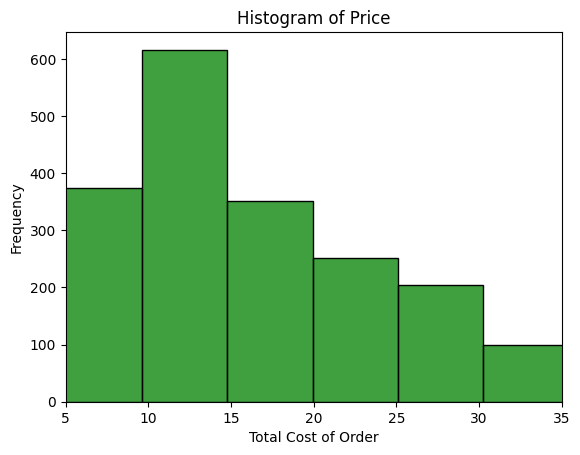

In [16]:
#Let's group the price in to bins that represent order total in different ranges 6 ($5-10, 10-15, 15-20, 20-25 and 25-30) and 10
#Findings:
#With 6 bins, # of order total is highest betweeen 10 to 15 dollars and # gradually decreases after that.
plt.title('Histogram of Price')
plt.xlim(5,35)
plt.xlabel('Total Cost of Order')
plt.ylabel('Frequency')
sns.histplot(data=dfnew, x='cost_of_the_order', color='green', bins=6)

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

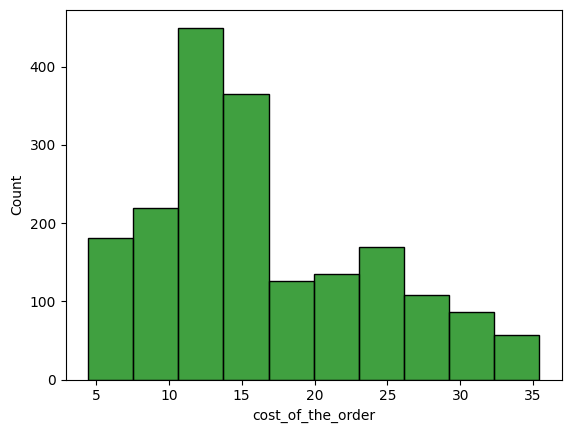

In [17]:
#Findgins:
#With 10 bins, we can find the there is another peak at order total cost around $25
sns.histplot(data=dfnew, x='cost_of_the_order', color='green', bins=10)

range 30.939999999999998 iqr 10.2175 binwidth 1.650476098152262
Freedman-Diaconis: 18
Sturges: 11
Scott 19


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

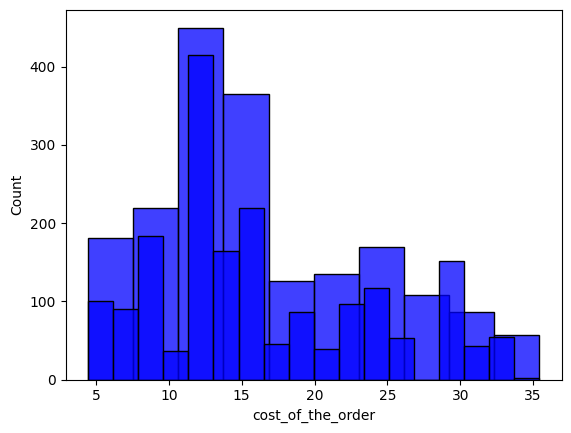

In [18]:
#Let's use different ways to calculate the bins
#Freedman-Diaconis: useful for most of cases and with dataset with non-normal distribution
# # of bins = range/bindwidth = (max-min)/(2*iqr/(# of rows ** (1/3)))
#bins_num = (dfnew['cost_of_the_order'].max  - dfnew['cost_of_the_order'].min)/(2*(dfnew['cost_of_the_order'].quantile(0.75)- dfnew['cost_of_the_order'].quantile(0.25)))/(len(dfnew['cost_of_the_order'])**(1/3))
range = dfnew['cost_of_the_order'].max()-dfnew['cost_of_the_order'].min()
iqr = dfnew['cost_of_the_order'].quantile(0.75)- dfnew['cost_of_the_order'].quantile(0.25)
binwidth = 2*iqr/len(dfnew['cost_of_the_order'])**(1/3)
bins_num = range/binwidth
print (f'range {range} iqr {iqr} binwidth {binwidth}')
bin_num=int(np.round(bins_num))
print(f'Freedman-Diaconis: {int(bins_num)}')

#Sturges: useful for dataset with normal distribution

binwidth = range /(1+np.log2(len(dfnew['cost_of_the_order'])))
bins_num = range/binwidth
print(f'Sturges: {int(bins_num)}')

sns.histplot(data=dfnew, x='cost_of_the_order', color='blue', bins=10)

#Scott: useful for dat set with normal distribution but less sensitive to outliers
binwidth = 3.49 * df['cost_of_the_order'].std() / (len(df['cost_of_the_order']) ** (1/3))
bins_num= range/binwidth
print(f'Scott {int(bin_num)}')

#Findings:
#Use the Freedman-Diaconis method with bins = 18
sns.histplot(data=dfnew, x='cost_of_the_order', color='blue', bins=18)





<Axes: xlabel='cuisine_type', ylabel='count'>

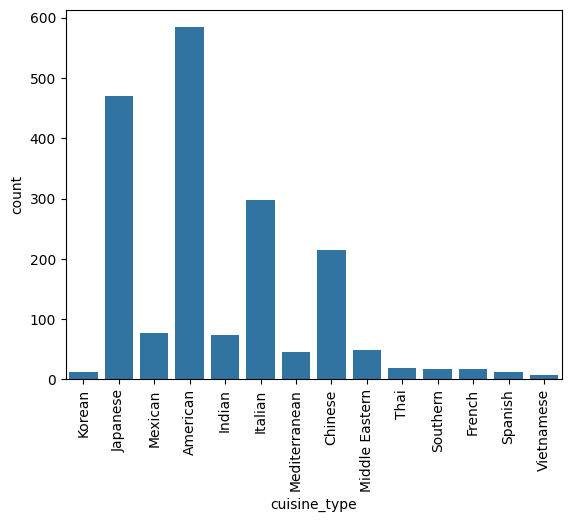

In [19]:
#Let's look atcruisine types
plt.xticks(rotation=90)
sns.countplot(data=dfnew, x='cuisine_type')



<Axes: xlabel='day_of_the_week', ylabel='count'>

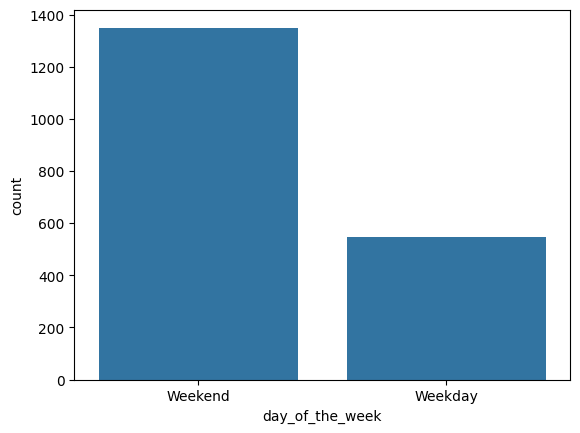

In [20]:
#Weekend vs weekdday
sns.countplot(data=dfnew, x='day_of_the_week')

<Axes: xlabel='food_preparation_time'>

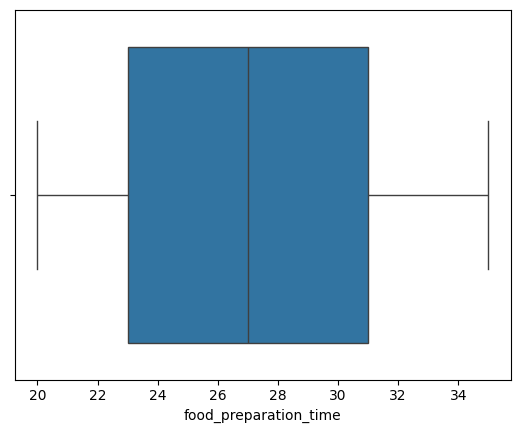

In [21]:
#Let's look at delivery time with boxplot
sns.boxplot(data=dfnew, x='food_preparation_time')


<Axes: xlabel='cost_of_the_order'>

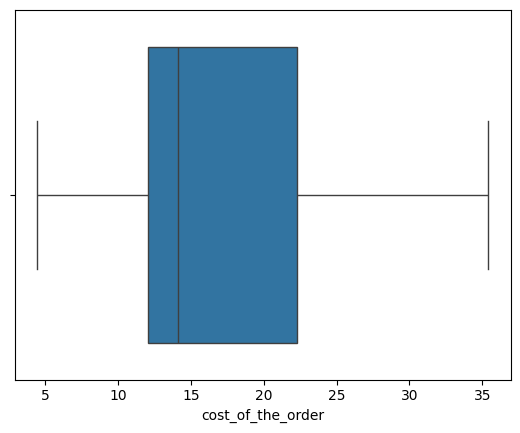

In [22]:
#Let's look at cost of the order with boxplot
sns.boxplot(data=dfnew, x='cost_of_the_order')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
dfnew.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
cdf=dfnew.groupby('cuisine_type')['cuisine_type', 'day_of_the_week'].apply(lambda wd: (wd['day_of_the_week']=="Weekend").sum()).sort_values(ascending=False).head(1)
cdf.head()

/var/folders/y_/2y866jmx1gn2brl5tr5339hc0000gn/T/ipykernel_42210/3813808950.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cdf=dfnew.groupby('cuisine_type')['cuisine_type', 'day_of_the_week'].apply(lambda wd: (wd['day_of_the_week']=="Weekend").sum()).sort_values(ascending=False).head(1)


cuisine_type
American    415
dtype: int64

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
percentage = len(dfnew.loc[df['cost_of_the_order']>20.0])/(1.0*len(df['cost_of_the_order']))*100
print(f'percentage of the order is greater than $20 is {np.round(percentage)}%')

percentage of the order is greater than $20 is 29.0%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
d = dfnew['delivery_time'].mean()
print(f'mean oder delivery time is {np.round(d)} mins')

mean oder delivery time is 24.0 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
dfnew.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

##### **Heatmap** analysis of different numberical variables for correlation

/var/folders/y_/2y866jmx1gn2brl5tr5339hc0000gn/T/ipykernel_42210/2062720382.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcorr1.corr(), annot=True, cmap='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

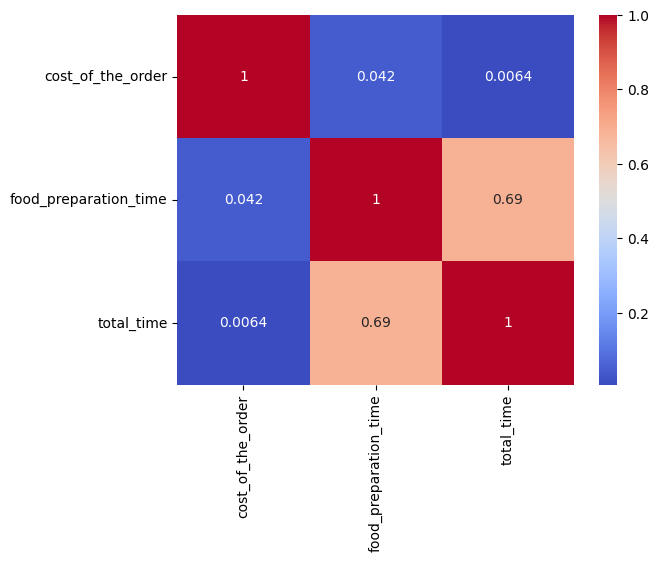

In [28]:
dfnew['total_time'] = df['delivery_time'] + df['food_preparation_time']

#dfcorr = dfnew.loc[:,['day_of_the_week', 'delivery_time', 'cost_of_the_order', 'cuisine_type', 'food_preparation_time', 'good_rating']]
#dfcorr1 = dfnew.loc[:,[ 'delivery_time', 'cost_of_the_order',  'food_preparation_time', 'total_time', 'cuisine_type']]
dfcorr1 = dfnew.loc[:,[ 'cost_of_the_order',  'food_preparation_time', 'total_time', 'cuisine_type']]


sns.heatmap(dfcorr1.corr(), annot=True, cmap='coolwarm')
plt.show


/var/folders/y_/2y866jmx1gn2brl5tr5339hc0000gn/T/ipykernel_42210/4029772278.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

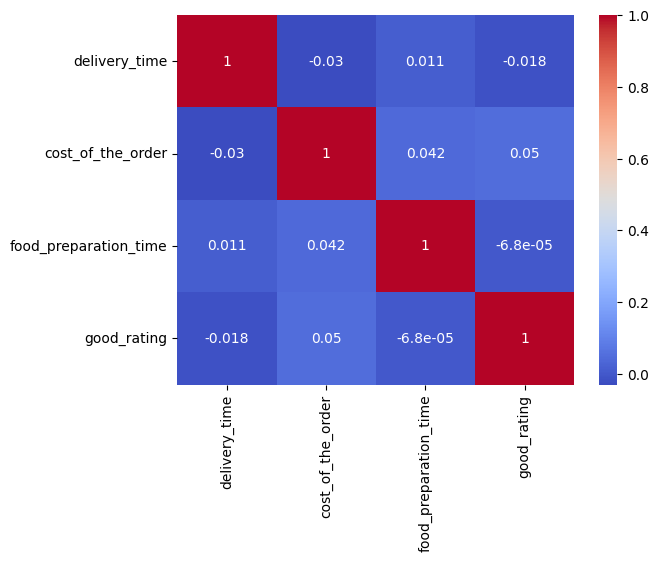

In [29]:
def isGoodRating(x):
    if x == '4':
        return True
    elif x =='5':
        return True
    else:    
        return False
dfnew['good_rating'] = dfnew['rating'].apply(isGoodRating )

dfcorr = dfnew.loc[:,['day_of_the_week', 'delivery_time', 'cost_of_the_order', 'cuisine_type', 'food_preparation_time', 'good_rating']]
dfcorr1 = dfnew.loc[:,[ 'delivery_time', 'cost_of_the_order',  'food_preparation_time', 'total_time']]


sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm')
plt.show

#### **Multiple Boxplot** analysis of cursines vs cost of the order

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

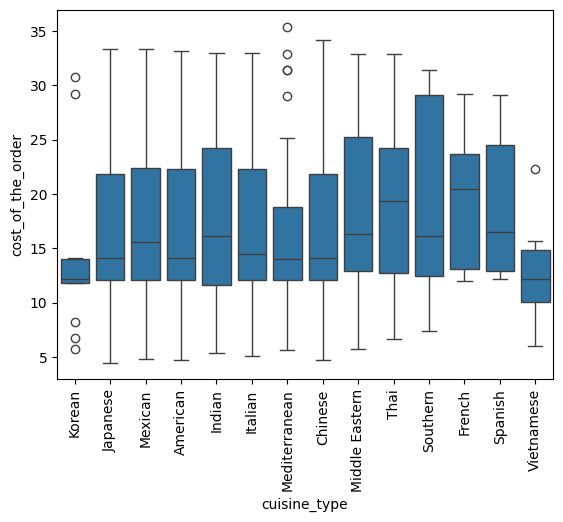

In [30]:
sns.boxplot(data=dfnew, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)

#### ***Scatter*** plot of cuisine vs total # of good ratings (rating >=4)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Korean'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Mexican'),
  Text(9, 0, 'Middle Eastern'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Thai'),
  Text(13, 0, 'Vietnamese')])

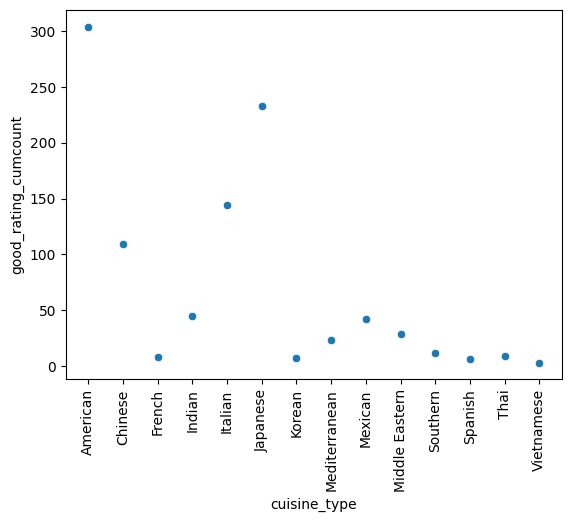

In [31]:
def isGoodRating(x):
    if x == '4':
        return True
    elif x =='5':
        return True
    else:    
        return False
dfnew['good_rating'] = dfnew['rating'].apply(isGoodRating )
dfrating = dfnew.loc[dfnew['good_rating']==True,['cuisine_type', 'good_rating']]
dfrating['good_rating_cumcount'] = dfrating.groupby('cuisine_type').cumcount()+1
dfw= dfrating.groupby('cuisine_type')['good_rating_cumcount'].max().reset_index()

sns.scatterplot(data=dfw, x='cuisine_type', y='good_rating_cumcount')
plt.xticks(rotation=90)

#### ***Pie*** chart of % of total order amount across all cruisines

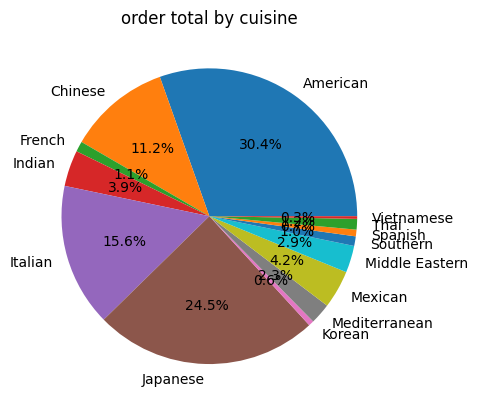

In [32]:
#Creating a Pie chart to view % of total order across all crusines
df1= dfnew.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index().rename(columns={'cost_of_the_order': 'order_total'})
plt.pie(df1['order_total'], labels=df1['cuisine_type'], autopct='%1.1f%%')
plt.title("order total by cuisine")
plt.show()



#### ***Scatter*** plot of % of good ratings (rating>4) vs all ratings per cuisine

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Korean'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Mexican'),
  Text(9, 0, 'Middle Eastern'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Thai'),
  Text(13, 0, 'Vietnamese')])

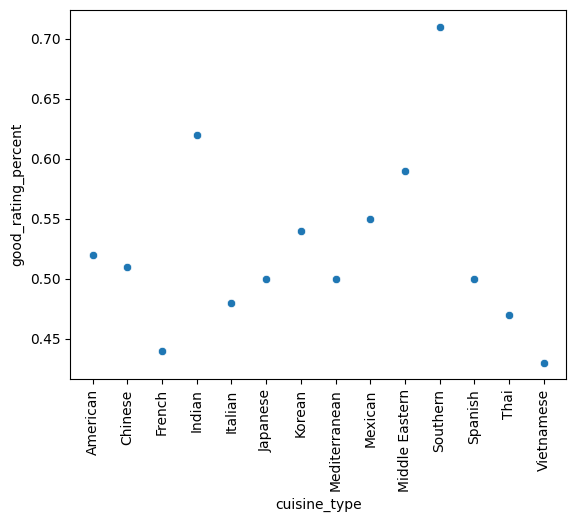

In [33]:
#Creating a Pie chart to view % of good rating (4 or 5) per cuisine across all crusines

#Get total good ratings per cuisine
def isGoodRating(x):
    if x == '4':
        return True
    elif x =='5':
        return True
    else:    
        return False
dfnew['good_rating'] = dfnew['rating'].apply(isGoodRating )
dfrating = dfnew.loc[dfnew['good_rating']==True,['cuisine_type', 'good_rating']]
dfrating['good_rating_cumcount'] = dfrating.groupby('cuisine_type').cumcount()+1
dfw= dfrating.groupby('cuisine_type')['good_rating_cumcount'].max().reset_index()

#Get total # of ratings per cusine
df1 = dfnew.groupby('cuisine_type')['rating'].count().reset_index().rename(columns={'rating':'total_num__of_ratings'})

#merge dfw and df1
dfm = pd.merge(dfw, df1, on='cuisine_type')
dfm['good_rating_percent'] = round(dfm['good_rating_cumcount']/dfm['total_num__of_ratings'], 2)

sns.scatterplot(data=dfm, x='cuisine_type', y='good_rating_percent')
plt.xticks(rotation=90)

#### ***Table*** Get the restaurants that had more than 50 ratings but with less than 50% of good ratings(>4)

In [34]:
#Creating a Pie chart to view % of good rating (4 or 5) per cuisine across all crusines

#Get total good ratings per cuisine
def isGoodRating(x):
    if x == '4':
        return True
    elif x =='5':
        return True
    else:    
        return False
dfnew['good_rating'] = dfnew['rating'].apply(isGoodRating )
dfrating = dfnew.loc[dfnew['good_rating']==True,['restaurant_name', 'good_rating']]
dfrating['good_rating_cumcount'] = dfrating.groupby('restaurant_name').cumcount()+1
dfw= dfrating.groupby('restaurant_name')['good_rating_cumcount'].max().reset_index()

#Get total # of ratings per cusine
df1 = dfnew.groupby('restaurant_name')['rating'].count().reset_index().rename(columns={'rating':'total_num__of_ratings'})

#merge dfw and df1
dfm = pd.merge(dfw, df1, on='restaurant_name')
dfm['good_rating_percent'] = round(dfm['good_rating_cumcount']/dfm['total_num__of_ratings'], 2)
type(dfm['good_rating_percent'] )
df2 = dfm.query('total_num__of_ratings > 50 and good_rating_percent < 0.50')
df2


,restaurant_name,good_rating_cumcount,total_num__of_ratings,good_rating_percent
17,Blue Ribbon Sushi,57,119,0.48
91,Parm,30,68,0.44
101,RedFarm Hudson,25,55,0.45


#### ***Table*** customer with the highest order amount and/or order frequence for promotion offers

In [35]:
df1 = dfnew.groupby('customer_id')['order_id'].count().reset_index().rename(columns={'order_id':'total_num_of_orders'})
df2 = dfnew.groupby('customer_id')['cost_of_the_order'].sum().reset_index().rename(columns={'cost_of_the_order':'highest_order_amt'})
df2
df3 = pd.merge(df1, df2, on='customer_id')
df3
df3.query('total_num_of_orders >5 and highest_order_amt>150.0')

#df3[(df3['total_num_of_orders']>5) and (df3['highest_order_amt'].astype(float)>0.0)]


,customer_id,total_num_of_orders,highest_order_amt
84,47440,10,158.18
116,52832,13,225.80
839,250494,8,183.83


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [36]:
def isGoodRating(x):
    if x == '4':
        return True
    elif x =='5':
        return True
    else:    
        return False
dfnew['good_rating'] = dfnew['rating'].apply(isGoodRating )
dfrating = dfnew.loc[dfnew['good_rating']==True,['restaurant_name', 'good_rating']]
dfrating['good_rating_cumcount'] = dfrating.groupby('restaurant_name').cumcount()+1

#using the unique and doing some python loop to display some nice msg.  
#I could have used the max agg function + loc conditional logic to get the same result
dfpromo = dfrating.loc[dfrating['good_rating_cumcount']>50,['restaurant_name']]

promoStr=f'The list of restaurant qualified for the promotions are:\n'
for rn in dfpromo['restaurant_name'].unique():
    promoStr+=f'{rn} \n'
print(promoStr)





The list of restaurant qualified for the promotions are:
Shake Shack 
The Meatball Shop 
Blue Ribbon Sushi 
Blue Ribbon Fried Chicken 



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:

t1= dfnew[dfnew['cost_of_the_order'].astype(float)>20.0]
total25 = t1['cost_of_the_order'].sum()*.25
t2= dfnew[(dfnew['cost_of_the_order'].astype(float)>5.0) & (dfnew['cost_of_the_order'].astype(float)<=20.0)]
total15= t2['cost_of_the_order'].sum()*.15
print(f'Total is ${round(total25+total15, 2)}')


Total is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
dfnew['total_time'] = dfnew['food_preparation_time'] + dfnew['delivery_time']
percent = len(dfnew.loc[dfnew['total_time']>60])/len(dfnew['total_time'])*100
print(f'percent of the order taken more than 60 mins is {round(percent)}%')


percent of the order taken more than 60 mins is 11%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:
mWeekday =dfnew.loc[dfnew['day_of_the_week']=='Weekday']['delivery_time'].mean()
mWeekend =dfnew.loc[dfnew['day_of_the_week']=='Weekend']['delivery_time'].mean()

timeVariance = round(mWeekday-mWeekend)
if(timeVariance>0):
    print(f'Weekday mean delivery time is slower than weekend by {timeVariance} mins')
else :
    print(f'Weekday mean delivery time is faster by {timeVariance} mins')



Weekday mean delivery time is slower than weekend by 6 mins


## **Recommendation**
### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Assume the following goals:<br>
<ul>
<li>1.)increase platform fee collected; 
<li>2.)increase # of the restaurants per cuisine; 
<li>3.)increase customer rating
<li>4.)help improve food prep time and delivery time
<li>5.)increase order total per each order per cutomer
<br/>
The recommendations are:
<ul>
<li>a. Promote different cuisines: For the platform, increase promotion of the cuisine with highest rating and median order toal, for example, Southern cuisine, because it has highest percentage of good rating, high order amount.  This will help the platform and the restaurants as long as the the restaurants can handle the added demand.  This is win-win-win: happy customers, more money for the restaurants and the platform
<li>b. Improve customer rating: Help improve American and Chinese and Japanese cuisine experiences by working with these restaurants to improve % of good ratings.  It is low comparing with other cuisines.  This will help increase brand values for cuisine and restaurants.  In turn it will increase the revenue for the platform.
<li>c. Reward restaurants with good ratings: In addition to reward restaurants with good ratings, we can also provide additional consulating servies to the restaurants which don't have good ratings, for example the following with more than 50 ratings but less than 50% are good (>4). (for example,  Blue Ribbon Sushi, Parm, RedFarm Hudson
<li>d. Demote low performing restaurants: For low performing restaurants based on rating from c. above, we can also create an algorithm to Not to promote these restaurants
<li>e. Reward good customers: Another way to increase platform fee is to provide regular customers and customer with higher order dollar amount with promotions, for example provide promotion for customers who ordered more than 5 times with total order amount greater than $130 (customer id: 47440, 52832, 250494)
<li>f. Reduce food prep/delivery time: Food prep. time and delivery time has negative correlation with rating.  Improving these two times, will help improve customer rating.
